In [5]:
from sklearn import tree
import pandas as pd 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [9]:
#Procedimentos já explicados em outros notebooks
dfIris = pd.read_csv('Iris.csv').set_index('Id')
dfIris['Species'] = pd.Categorical(dfIris['Species'])
dfIris['code'] = dfIris['Species'].cat.codes

dfIris_train, dfIris_test = train_test_split(dfIris, test_size=0.2, random_state=10)

X_train = dfIris_train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y_train = dfIris_train['code']
X_test = dfIris_test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y_test = dfIris_test['code']


## Rede neural

In [10]:
from sklearn.neural_network import MLPClassifier

#hidden_layer_sizes=(x,y,...) define a arquitetura, x,y,... representam o número de nós em cada camada escondida.
neuralNet = MLPClassifier( hidden_layer_sizes=(3,3), random_state=42, max_iter=10000)

scores = cross_val_score(neuralNet, X_train, y_train, cv=10)

# melhor do que todos os métodos testados
scores.mean()

0.9333333333333332

### Calculando a F1-score em vez da acurácia

In [11]:
scores = cross_val_score(neuralNet, X_train, y_train, cv=10, scoring='f1_macro')

# o valor da acurária e F1-score são parecidos
scores.mean()

#Isso já era esperado, pois o dataset possui um número balanceado de classes (categorias)

0.9216931216931217

## Selecionando os melhores parâmetros - GridSearch - rede neural

In [12]:
from sklearn.model_selection import GridSearchCV
import numpy as np

nn_parameters = {'solver': ['sgd','adam'], 'max_iter': [10000,15000 ], 'alpha': 10.0 ** -np.arange(1, 5), 'hidden_layer_sizes':[(5,), (10,), (5, 5), (10, 10), (10, 10)], 'random_state':[42]}

#Aqui estamos selecionando as melhores combinações com base em uma validação cruzada (k-fold = 5)
clf = GridSearchCV(MLPClassifier(), nn_parameters,cv=5)


#Repare que a busca de parâmetros está sendo feita em um dataset de treino
clf.fit(X_train, y_train)

#Testando o resulatdo em um dataset de teste, não utilizado previamente
clf.score(X_test, y_test)


0.9666666666666667

In [13]:
clf.best_params_

{'alpha': 0.1,
 'hidden_layer_sizes': (5,),
 'max_iter': 10000,
 'random_state': 42,
 'solver': 'adam'}

## Random Forest                                

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Parâmetros para avaliar (não são todos os possíveis)
rndForest_parameters = {'criterion': ['gini','entropy'],'n_estimators': [25,50,70], 'random_state':[42], 'class_weight': [None,'balanced', 'balanced_subsample']}

#Aqui estamos selecionando as melhores combinações com base em uma validação cruzada (k-fold = 5)
rndForest = GridSearchCV( RandomForestClassifier(), rndForest_parameters,cv=5)

rndForest.fit(X_train, y_train)

rndForest.score(X_test, y_test)


0.9666666666666667

In [15]:
rndForest.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'n_estimators': 25,
 'random_state': 42}

# Regressão

In [19]:
#Dataset business toronto (demonstrado anteriormente)

dfBusiToronto = pd.read_csv('businessToronto.csv')

<AxesSubplot:xlabel='stars', ylabel='review_count'>

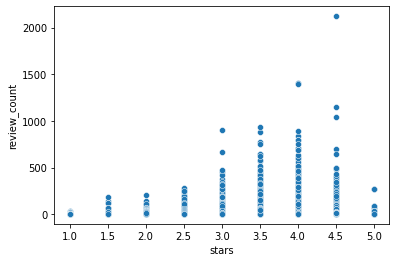

In [20]:
#Previsão de número de reviews

X = dfBusiToronto.loc[:,['stars']]
y = dfBusiToronto.loc[:,['review_count']]

#Plot
import seaborn as sns 
sns.scatterplot(data=dfBusiToronto, x="stars", y="review_count")

### Linear regression

In [21]:
from sklearn import linear_model

linRegr = linear_model.LinearRegression()

scoresLinReg = cross_val_score(linRegr, X, y, cv=5, scoring='r2')

print(scoresLinReg.mean())


0.005715925154484558


### Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor


treeRegr = DecisionTreeRegressor(random_state=42)

scoresTreeReg = cross_val_score(treeRegr, X, y, cv=5, scoring='r2')

print(scoresTreeReg.mean())

0.041667220876411656
